<h1 style='text-align:center'> Module 1 Assessment</h1>

This assessment is designed to test your understanding of the Mod 1 material. It covers:

* Python Fundamentals
* Working with Statistical Data
* Pandas and Numpy
* Data Visualization
* Linear Regression

Read the instructions carefully. You will be asked both to write code and respond to a few short answer questions.

#### Note on the short answer questions
For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

## Python Fundamentals

In the first section, we will work with various Python data types and try to accomplish certain tasks using some Python fundamentals. Below, we've defined a dictionary with soccer player names as keys for nested dictionaries containing information about each players age, nationality, and a list of teams they have played for.   

In [1]:
players = {
	'L. Messi': {
		'age': 31,
		'nationality': 'Argentina',
		'teams': ['Barcelona']
	},
	'Cristiano Ronaldo': {
		'age': 33,
		'nationality': 'Portugal',
		'teams': ['Juventus', 'Real Madrid', 'Manchester United']
	},
	'Neymar Jr': {
		'age': 26,
		'nationality': 'Brazil',
		'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
	},
	'De Gea': {
		'age': 27,
		'nationality': 'Spain',
		'teams': ['Atletico Madrid', 'Manchester United']
	},
	'K. De Bruyne': {
		'age': 27,
		'nationality': 'Belgium',
		'teams': ['Chelsea', 'Manchester City']
	}
}

<b>1) Create a function that takes in a dictionary and returns a list of keys for that dictionary. In our case it should return a list of player names. Use python's documentation on dictionaries for help if needed. We started the function below for you, complete it below the doc string (don't forget your return statement!)</b>

In [3]:
def get_keys(dict_):
    '''
    Generate list of keys in dictionary
    
    Parameters
    ----------
    dict_ : dictionary object
        Dictionary with player names as keys
    Returns
    --------
    keys_ :  list object
        List object containing keys for the dictionary
    '''
    return list(dict_.keys())

In [4]:
#assign output of get_keys function to player_names
player_names = get_keys(players)

<b> 2) Great! Now that we have each players name, let's use that information to create a list of tuples containing each player's name along with their nationality.</b>

In [8]:
def get_nationality(dict_, player_names):
    '''
    Generate list of tuples such that the first element in the tuple is 
    a players name and the second is their nationality 
    [('L. Messi', 'Argentina'), ('Christiano Ronaldo', 'Portugal'), ...]
    
    Parameters
    ----------
    dict_ : dictionary object
        Dictionary of player information
    player_names: 
        List of player names
    Returns
    --------
    nationalities :  list object
        List object containing tuples of players name and their nationality 
    '''
    list_of_tuple = []
    for player in player_names:
        nationality = dict_[player]['nationality']
        each_tuple = (player, nationality)
        list_of_tuple.append(each_tuple)
    return list_of_tuple

In [9]:
nationality = get_nationality(players, player_names)

#### 3) Now, create a function that obtains players based on which teams they've been on.

In [24]:
def get_players_on_team(dict_,team_name):
    '''
    Generate a list of players that have ever played on a given team.
    
    Parameters
    ----------
    dict_ : dictionary object
        Dictionary of player information
    team_name: string
        Name of team to be searched for
    
    Returns
    --------
    player_list : list object
        List containing player names
    '''
    player_list = []
    for player in get_keys(dict_): 
        if team_name in players[player]['teams']:
            player_list.append(player)
    return player_list

In [25]:
players_on_manchester_united = get_players_on_team(players,'Manchester United')

## Pandas and Numpy

In this section you will be doing some preprocessing and exploratory data analysis for a dataset for the videogame FIFA19 (https://www.kaggle.com/karangadiya/fifa19).  The dataset contains both data for the game as well as information about the players' real life careers.  You will be building toward running a regression. 

<b>1) Read the CSV file into a pandas dataframe

The data you'll be working with is found in a file called './data/fifa.csv'  Complete the first function below to read it into a pandas dataframe. 

Check the contents of your dataframe with `df.head()`</b>

In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [63]:
# CODE HERE
def get_fifa_data():
    '''
    Parameters
    ----
    
    Returns 
    ----
    df : Pandas DataFrame Object
        dataframe containing data from fifa.csv
    '''
    return pd.read_csv('./data/fifa.csv' )

In [64]:
df = get_fifa_data()
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


<b>2) Check for duplicates
    
First, check how many rows are in the dataset, then check how many unique values are in the "ID" column.</b>

In [31]:
#code here to see the size of the dataframe
print('The size of the dataframe is: {}'.format(len(df)))

The size of the dataframe is: 20000


In [38]:
#code here to check number of unique ids
print('The number of the unique id is: {}'.format(len(df.ID.unique())))

The number of the unique id is: 18207


<b> 3) Drop Duplicates
    
It looks like there are duplicates.  Get rid of them by dropping duplicate rows. After you have dropped them, see how many rows are remaining.</b>

In [69]:
#code here
df.drop_duplicates(['ID'],keep='first', inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 19999
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [71]:
#now see how many rows there are
print('The size of the new dataframe is: {} \nThe number of the unique id is: {}'.format(len(df), len(df.ID.unique())))

The size of the new dataframe is: 18207 
The number of the unique id is: 18207


<b> 4. Drop n/a rows for "Release Clause"
    
Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. Release Clause will be the target variable for our regression model.  After you have dropped them, see how many rows are remaining.</b>

In [81]:
#code here to drop n/a rows
df.dropna(subset=['Release Clause'],inplace=True)

In [83]:
#now check how many rows are left 
print('The size (row number) of the new dataframe is: {}'.format(len(df)))

The size (row number) of the new dataframe is: 16643


<b> 5) Convert players' heights to inches. Replace the original height column.
First create a function, then use it on your dataframe. Create a function that convert a string into a integer and then apply that function to all of the height column.</b>

In [85]:
df.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [113]:
#code here to write a helper function
def convert_height(height):
    '''
    inputs: height (string)
    ----
    returns: height in inches (int)
    '''
    feet = int(height.split("'")[0])
    inch = int(height.split("'")[1])
    return int(feet*12+inch)

In [114]:
#test here
convert_height("5'7")

67

In [116]:
#code here to use the function on the height column
df.Height = df.Height.map(convert_height)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 19999
Data columns (total 89 columns):
Unnamed: 0                  16643 non-null int64
ID                          16643 non-null int64
Name                        16643 non-null object
Age                         16643 non-null int64
Photo                       16643 non-null object
Nationality                 16643 non-null object
Flag                        16643 non-null object
Overall                     16643 non-null int64
Potential                   16643 non-null int64
Club                        16643 non-null object
Club Logo                   16643 non-null object
Value                       16643 non-null object
Wage                        16643 non-null object
Special                     16643 non-null int64
Preferred Foot              16643 non-null object
International Reputation    16643 non-null float64
Weak Foot                   16643 non-null float64
Skill Moves                 16643 non-null fl

## Data Visualization

<b> 1) Make a histogram of players age
    
_Add a title and x axis label._ Use whichever plotting library you are most comfortable with. </b>

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'the histogram of players age')

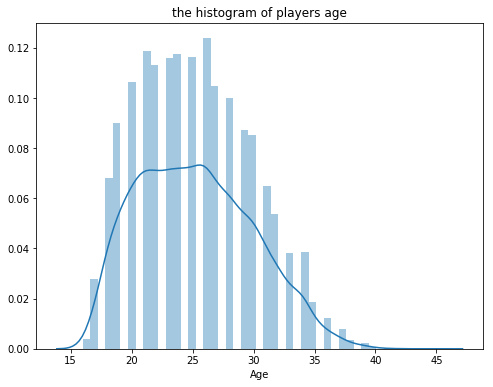

In [125]:
#histogram
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df.Age)
plt.xlabel('Age')
plt.title('the histogram of players age')

<b> 2) Make a bar chart for the 10 countries with the most players (by nationality)</b>

Make sure to include x labels on your chart!

In [138]:
#code here to get the top 10 countries with the most players
agg = df.groupby(['Nationality']).agg(['count'])
top_ten = agg.ID.sort_values(by='count', ascending=False).head(10)

In [205]:
top_ten.values.reshape(-1)

array([1475, 1151,  974,  853,  833,  788,  579,  570,  455,  426])

In [196]:
top = pd.DataFrame(data=list(top_ten.values), index=top_ten.index)

Text(0.5, 1.0, 'the histogram of players age')

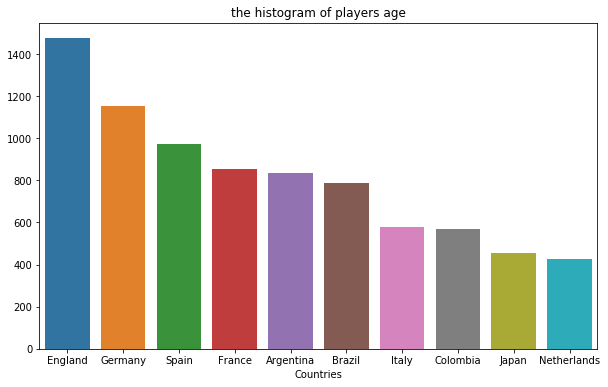

In [206]:
#code here to plot a bar chart
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=top.index, y=top_ten.values.reshape(-1))
plt.xlabel('Countries')
plt.title('the histogram of players age')

<b> 3) Make a scatter plot for the player stats StandingTackle and SlidingTackle

What can we say about these two features? </b>

Text(0.5, 1.0, 'the scatterplot of StandingTackle versus SlidingTackle')

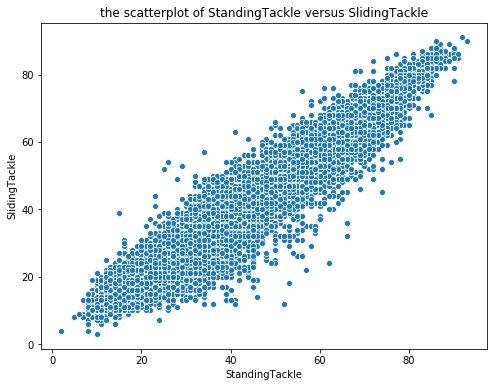

In [156]:
#code here to plot a scatterplot
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x=df.StandingTackle, y=list(df.SlidingTackle))
plt.xlabel('StandingTackle')
plt.ylabel('SlidingTackle')
plt.title('the scatterplot of StandingTackle versus SlidingTackle')


// It seems like there is a positive correlation between the StandingTackle and the SlidingTackle//

### Exploring Statistical Data

We'll continue using the same FIFA 2019 dataset.  This section will assess your ability to use numpy and work with summary statistics.

<b>1) Convert the Release Clause Price from Euros to Dollars
    
Create a new column that has the 'release_clause' in dollars.

1.2 Dollars = 1 Euro.</b>

In [157]:
import numpy as np

In [159]:
#code here to convert the column of euros to dollarss
df['Release Clause in dollar'] = 1.2*df['Release Clause']

In [160]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Clause in dollar
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0,271800.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0,152520.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0,273720.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0,166320.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0,235680.0
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100.0,206520.0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400.0,164880.0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000.0,196800.0
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600.0,125520.0
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500.0,173400.0


<b>2) Get summary statistics for all numeric columns
    
(Please don't do each column individually!)</b>

In [162]:
#code here
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Clause in dollar
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,1.664300e+04
mean,5422.904945,213845.010094,25.226221,66.162771,71.140900,1595.383404,1.114823,2.942919,2.349516,19.657213,...,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409,228201.273629,2.738415e+05
std,2721.036613,30546.285826,4.716588,7.008236,6.151409,275.723076,0.398559,0.659933,0.755855,16.054811,...,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985,299251.865865,3.591022e+05
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.200000e+03
25%,3175.500000,199569.500000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,8.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2500.000000,3.000000e+03
50%,5488.000000,221493.000000,25.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,17.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19800.000000,2.376000e+04
75%,7770.000000,236802.000000,29.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431000.000000,5.172000e+05
max,9999.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999000.000000,1.198800e+06


<b>3) What is the mean age and the median age for the players in this dataset?  How are the mean and median related to each other?</b>

// mean age: 25.226221//
// median age: 25.000000// 
// if the distribution is less skewed, the mean and median tends to be closer. However, they are not neccesary the same or even similar// 

#### 4) Who is the oldest player in Argentina and how old is he?  
Hint: a groupby clause might help here

In [165]:
# code here
agg1 = df.groupby(['Nationality']).agg(['max'])
agg1


,Unnamed: 0,ID,Name,Age,Photo,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Clause in dollar
,max,max,max,max,max,max,max,max,max,max,...,max,max,max,max,max,max,max,max,max,max
Nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7327,244175,N. Husin,26,https://cdn.sofifa.org/players/4/19/244175.png,https://cdn.sofifa.org/flags/149.png,63,71,Walsall,https://cdn.sofifa.org/teams/2/light/1937.png,...,62.0,58.0,59.0,14.0,14.0,11.0,12.0,14.0,878000.0,1053600.0
Albania,9798,245792,Y. Ramadani,34,https://cdn.sofifa.org/players/4/19/245792.png,https://cdn.sofifa.org/flags/1.png,81,86,Örebro SK,https://cdn.sofifa.org/teams/2/light/896.png,...,80.0,81.0,80.0,81.0,77.0,75.0,78.0,86.0,797000.0,956400.0
Algeria,9993,245565,Z. Ferhat,35,https://cdn.sofifa.org/players/4/19/49659.png,https://cdn.sofifa.org/flags/97.png,85,85,Yeovil Town,https://cdn.sofifa.org/teams/2/light/95.png,...,79.0,81.0,84.0,73.0,67.0,62.0,70.0,76.0,979000.0,1174800.0
Andorra,5444,192937,Marc Vales,28,https://cdn.sofifa.org/players/4/19/192937.png,https://cdn.sofifa.org/flags/2.png,62,64,Sandefjord Fotball,https://cdn.sofifa.org/teams/2/light/1757.png,...,54.0,56.0,67.0,9.0,7.0,12.0,8.0,6.0,384000.0,460800.0
Angola,8493,239267,Rudy,34,https://cdn.sofifa.org/players/4/19/239267.png,https://cdn.sofifa.org/flags/98.png,78,79,Zagłębie Sosnowiec,https://cdn.sofifa.org/teams/2/light/896.png,...,80.0,80.0,77.0,14.0,15.0,15.0,16.0,15.0,956000.0,1147200.0
Antigua & Barbuda,8061,235773,R. Browne,27,https://cdn.sofifa.org/players/4/19/235773.png,https://cdn.sofifa.org/flags/63.png,69,77,Yeovil Town,https://cdn.sofifa.org/teams/2/light/97.png,...,68.0,69.0,68.0,11.0,13.0,16.0,15.0,13.0,700000.0,840000.0
Argentina,9964,246609,W. Pérez,41,https://cdn.sofifa.org/players/4/19/49212.png,https://cdn.sofifa.org/flags/52.png,94,94,West Ham United,https://cdn.sofifa.org/teams/2/light/873.png,...,85.0,85.0,84.0,83.0,79.0,84.0,82.0,84.0,998000.0,1197600.0
Armenia,9704,235989,Y. Movsisyan,32,https://cdn.sofifa.org/players/4/19/235989.png,https://cdn.sofifa.org/flags/3.png,83,83,KAS Eupen,https://cdn.sofifa.org/teams/2/light/693.png,...,54.0,57.0,63.0,15.0,16.0,14.0,15.0,16.0,788000.0,945600.0


// W. Pérez is 41 already! //

## Linear Regression

<b> 1) What are the covariance and correlation between "GKDiving" and "GKHandling"? </b>

a. What is the difference between covariance and correlation?  
b. What can you infer from the relationship between these variables?  
c. Would it be a good idea to include both of these in a regression model?

In [171]:
#code here
print('The covariance between the GKDiving and GKHandling is: {}'.format(np.cov(df.GKDiving, df.GKHandling)[0][1]))
print('The correlation between the GKDiving and GKHandling is: {}'.format(df.GKDiving.corr(df.GKHandling)))

The covariance between the GKDiving and GKHandling is: 294.83505727273473
The correlation between the GKDiving and GKHandling is: 0.9706399004266668


// Answer:
a. the correlation is dimentionless, however, the covariance has unit of the multiplication of the two variables.
b. there is a strong correlation between the two variables
c. it would be a bad idea to include both of the variables in a regression model //

<b>2) Fit a linear regression using the `ols` module of statsmodels</b>

Let's see how well each players' in-game stats reflect their real-world monetary value as a player. We  will not be considering real-world factors for this model, just the variables listed below.

- y variable: Release Clause (the one in euros)
- x variables: 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes'

Once you have fit the linear regression, display the results (coefficient values, $R^2$, etc.). Displaying the results can be done with one method!

In [203]:
target + "~" + predictors

'Release Clause~Finishing+HeadingAccuracy+ShortPassing+Volleys+Dribbling+Curve+FKAccuracy+LongPassing+BallControl+Acceleration+SprintSpeed+Agility+Reactions+Balance+ShotPower+Jumping+Stamina+Strength+LongShots+Aggression+Interceptions+Positioning+Vision+Penalties+Composure+Marking+StandingTackle+SlidingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes'

In [ ]:
feats = df.columns.replace

In [207]:
#code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
# import statsmodels.formula.api as sm

Y = df['Release Clause']
X = df[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']]

list_of_predictors = ['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']

predictors = '+'.join(list_of_predictors)
target = 'Release Clause'
data = pd.concat([X,Y])

formula = target + "~" + predictors
result = ols(formula=formula, data=data).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

<b> 3) Interpret the results of the regression. 

Two players have the following stats: 

1) Finishing : 1, Heading Accuracy : 10, ShortPassing : 5

2) Finishing : 1, Heading Accuracy :  8, ShortPassing : 5

Assume all the remaining stats are the same for both players. By how much can we expect the Release Clause of each player to be different? Explain how you obtained your calculation. </b>

// answer here //